In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
neutral = pd.read_excel(r"<Path to the neutral file")
attack = pd.read_excel(r"Path to the attack file")

In [32]:
#cleaning Data
attack = attack.drop(columns=[n for n in attack.columns if n not in ["IPV4_SRC_ADDR","IPV4_DST_ADDR" ,"IN_BYTES", "SHORTEST_FLOW_PKT","LONGEST_FLOW_PKT"]], axis=1)
neutral = neutral.drop(columns=[n for n in neutral.columns if n not in ["IPV4_SRC_ADDR","IPV4_DST_ADDR" ,"IN_BYTES", "SHORTEST_FLOW_PKT","LONGEST_FLOW_PKT"]], axis=1)

In [35]:
#add empty columns
attack["malicious"] = 0
neutral["malicious"] = 0

In [43]:
attack

,IPV4_SRC_ADDR,IPV4_DST_ADDR,IN_BYTES,SHORTEST_FLOW_PKT,LONGEST_FLOW_PKT,malicious
0,10.0.0.4,12.156.0.226,3114172,33980,33980,0
1,10.0.0.4,12.156.0.226,2644,2644,2644,0
2,10.0.0.4,12.156.0.226,319,319,319,0
3,10.0.0.4,12.156.0.226,4806,4806,4806,0
4,10.0.0.4,12.156.0.226,5157836,46028,46028,0
...,...,...,...,...,...,...
55550,168.63.129.16,10.0.0.4,554,554,554,0
55551,168.63.129.16,10.0.0.4,4972,4972,4972,0
55552,168.63.129.16,10.0.0.4,676,676,676,0
55553,168.63.129.16,10.0.0.4,676,676,676,0


In [ ]:
#tag attack IP's as malicious only on attack
malicious1 = "<First IP Here>"
malicious2 = "<Second IP Here>"
attack["malicious"] = attack.apply(lambda row: 1 if row['IPV4_SRC_ADDR'] in [malicious1, malicious2] or row["IPV4_DST_ADDR"] in [malicious1, malicious2] else 0, axis=1)

In [69]:
#Combine both dataframes, and reset their index after stacking
data = pd.concat([attack, neutral])
data.reset_index().drop(columns=["index"])

,IPV4_SRC_ADDR,IPV4_DST_ADDR,IN_BYTES,SHORTEST_FLOW_PKT,LONGEST_FLOW_PKT,malicious
0,10.0.0.4,12.156.0.226,3114172,33980,33980,0
1,10.0.0.4,12.156.0.226,2644,2644,2644,0
2,10.0.0.4,12.156.0.226,319,319,319,0
3,10.0.0.4,12.156.0.226,4806,4806,4806,0
4,10.0.0.4,12.156.0.226,5157836,46028,46028,0
...,...,...,...,...,...,...
93722,168.63.129.16,10.0.0.4,277,277,277,0
93723,168.63.129.16,10.0.0.4,338,338,338,0
93724,168.63.129.16,10.0.0.4,338,338,338,0
93725,168.63.129.16,10.0.0.4,2486,2486,2486,0


In [ ]:
#drop the IP columns
data = data.drop(columns=["IPV4_SRC_ADDR", "IPV4_DST_ADDR"])

In [111]:
data

,IN_BYTES,SHORTEST_FLOW_PKT,LONGEST_FLOW_PKT,malicious
0,3114172,33980,33980,0
1,2644,2644,2644,0
2,319,319,319,0
3,4806,4806,4806,0
4,5157836,46028,46028,0
...,...,...,...,...
38167,277,277,277,0
38168,338,338,338,0
38169,338,338,338,0
38170,2486,2486,2486,0


In [102]:
#setting dependent and independent variables
X = data.drop('malicious', axis = 1)
y = data['malicious']

#splitting data
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)

#create the decision tree classifier
DT = DecisionTreeClassifier(max_depth=2)
DT.fit(X_train,y_train)




DecisionTreeClassifier(max_depth=2)

In [103]:
#statistics
from sklearn.metrics import accuracy_score
y_prediction = DT.predict(X_test)
accuracy_score(y_test, y_prediction)

0.7046303211351755

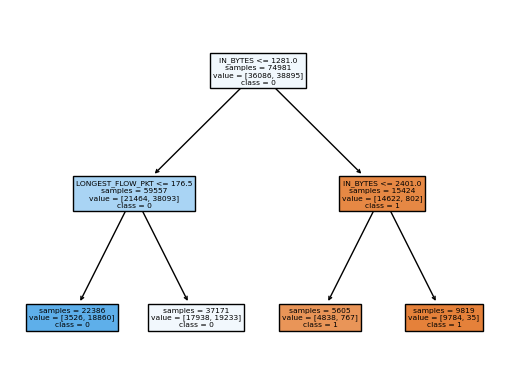

In [116]:
#plot the tree
from sklearn.tree import plot_tree
import numpy as np
from matplotlib import pyplot as plt

plot_tree(DT, feature_names=X.columns, impurity=False, filled=True, class_names=['1', '0'])
plt.show()